In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random

# Osnovne poteze
C, D = "C", "D"

# === Strategije ===

class Strategy:
    def __init__(self, name):
        self.name = name

    def reset(self):
        pass

    def move(self, my_history, opponent_history):
        raise NotImplementedError

class RandomStrategy(Strategy):
    def __init__(self):
        super().__init__("Random")

    def move(self, my_history, opponent_history):
        return random.choice([C, D])

class Pavlov(Strategy):
    def __init__(self):
        super().__init__("Pavlov")

    def move(self, my_history, opponent_history):
        if not my_history:
            return C
        if my_history[-1] == opponent_history[-1]:
            return my_history[-1]  
        else:
            return D if my_history[-1] == C else C  

class SuspiciousTitForTat(Strategy):
    def __init__(self):
        super().__init__("Suspicious Tit For Tat")

    def move(self, my_history, opponent_history):
        if not opponent_history:
            return D
        return opponent_history[-1]

class ReverseTitForTat(Strategy):
    def __init__(self):
        super().__init__("Reverse Tit For Tat")

    def move(self, my_history, opponent_history):
        if not opponent_history:
            return C
        return C if opponent_history[-1] == D else D

# === Simulacija dvoboja ===

def play_match(strat1, strat2, rounds=100):
    history1, history2 = [], []
    score1, score2 = 0, 0

    strat1.reset()
    strat2.reset()

    for _ in range(rounds):
        move1 = strat1.move(history1, history2)
        move2 = strat2.move(history2, history1)

        history1.append(move1)
        history2.append(move2)

        if move1 == C and move2 == C:
            score1 += 3
            score2 += 3
        elif move1 == C and move2 == D:
            score1 += 0
            score2 += 5
        elif move1 == D and move2 == C:
            score1 += 5
            score2 += 0
        elif move1 == D and move2 == D:
            score1 += 1
            score2 += 1

    return score1, score2, history1, history2

# === Turnir ===

strategies = [
    RandomStrategy(),
    Pavlov(),
    SuspiciousTitForTat(),
    ReverseTitForTat()
]

results = pd.DataFrame(0, index=[s.name for s in strategies], columns=[s.name for s in strategies])

for i, strat1 in enumerate(strategies):
    for j, strat2 in enumerate(strategies):
        score1, score2, _, _ = play_match(strat1, strat2)
        results.iloc[i, j] = score1



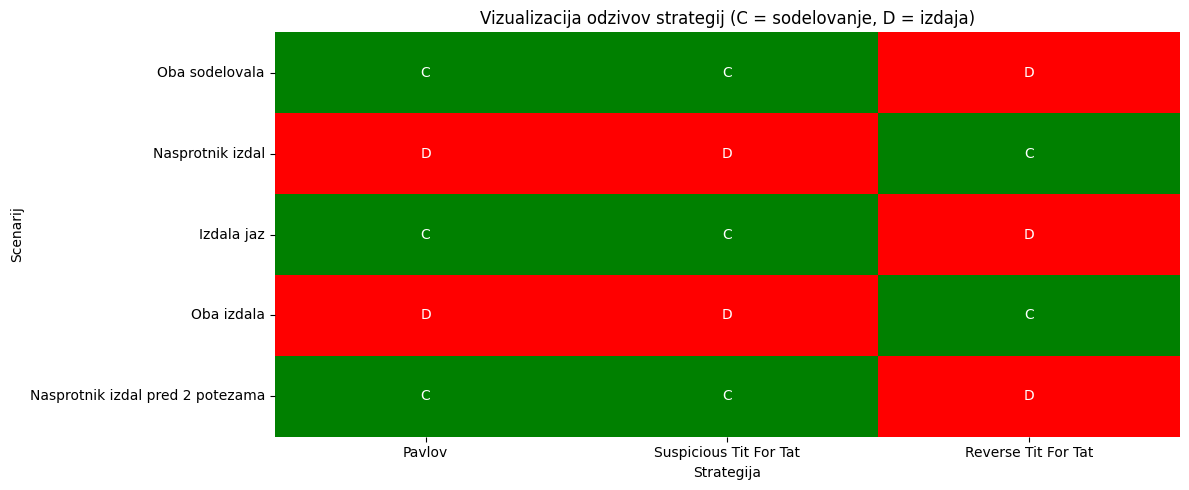

In [62]:
# Tabela pravilnosti strategij: kako se odzovejo na različne pretekle situacije (brez Random)

scenarios = [
    {"my_history": "C", "opponent_history": "C", "desc": "Oba sodelovala"},
    {"my_history": "C", "opponent_history": "D", "desc": "Nasprotnik izdal"},
    {"my_history": "D", "opponent_history": "C", "desc": "Izdala jaz"},
    {"my_history": "D", "opponent_history": "D", "desc": "Oba izdala"},
    {"my_history": "CC", "opponent_history": "DC", "desc": "Nasprotnik izdal pred 2 potezama"},
]

rows = []
filtered_strategies = [s for s in strategies if s.name != "Random"]

def simulate_response(strategy, my_history, opponent_history):
    s = strategy.__class__()
    return s.move(list(my_history), list(opponent_history))

for scenario in scenarios:
    row = {"Scenarij": scenario["desc"]}
    for strat in filtered_strategies:
        response = simulate_response(strat, scenario["my_history"], scenario["opponent_history"])
        row[strat.name] = response
    rows.append(row)

behavior_table = pd.DataFrame(rows)

color_map = {"C": 1, "D": 0}
color_df = behavior_table.copy()
strategies_only = behavior_table.columns[1:]

for strat in strategies_only:
    color_df[strat] = behavior_table[strat].map(color_map)


plt.figure(figsize=(12, 5))
sns.heatmap(
    color_df.set_index("Scenarij"),
    cmap=sns.color_palette(["red", "green"]),
    annot=behavior_table.set_index("Scenarij"),
    fmt='',
    cbar=False
)
plt.title("Vizualizacija odzivov strategij (C = sodelovanje, D = izdaja)")
plt.xlabel("Strategija")
plt.ylabel("Scenarij")
plt.tight_layout()
plt.show()


In [63]:
# Rezultati strategij

summary = pd.DataFrame(index=results.index)
summary["Skupaj"] = results.sum(axis=1)
summary["Povprečno"] = results.mean(axis=1).round(2)

ranked = summary.sort_values("Skupaj", ascending=False)

print("\nLestvica:")
for i, (name, row) in enumerate(ranked.iterrows(), 1):
    print(f"{i}. {name}: {row['Skupaj']} točk (povprečno {row['Povprečno']})")



Lestvica:
1. Pavlov: 997.0 točk (povprečno 249.25)
2. Random: 956.0 točk (povprečno 239.0)
3. Reverse Tit For Tat: 860.0 točk (povprečno 215.0)
4. Suspicious Tit For Tat: 820.0 točk (povprečno 205.0)


In [64]:
# Kako uspešna je bila vsaka strategija proti vsaki drugi posebej?
for i, strat1 in enumerate(results.index):
    print(f"\nStrategija '{strat1}' proti ostalim:")
    for j, strat2 in enumerate(results.columns):
        print(f"  → proti '{strat2}': {results.iloc[i, j]} točk")


Strategija 'Random' proti ostalim:
  → proti 'Random': 243 točk
  → proti 'Pavlov': 234 točk
  → proti 'Suspicious Tit For Tat': 241 točk
  → proti 'Reverse Tit For Tat': 238 točk

Strategija 'Pavlov' proti ostalim:
  → proti 'Random': 222 točk
  → proti 'Pavlov': 300 točk
  → proti 'Suspicious Tit For Tat': 250 točk
  → proti 'Reverse Tit For Tat': 225 točk

Strategija 'Suspicious Tit For Tat' proti ostalim:
  → proti 'Random': 245 točk
  → proti 'Pavlov': 250 točk
  → proti 'Suspicious Tit For Tat': 100 točk
  → proti 'Reverse Tit For Tat': 225 točk

Strategija 'Reverse Tit For Tat' proti ostalim:
  → proti 'Random': 210 točk
  → proti 'Pavlov': 225 točk
  → proti 'Suspicious Tit For Tat': 225 točk
  → proti 'Reverse Tit For Tat': 200 točk


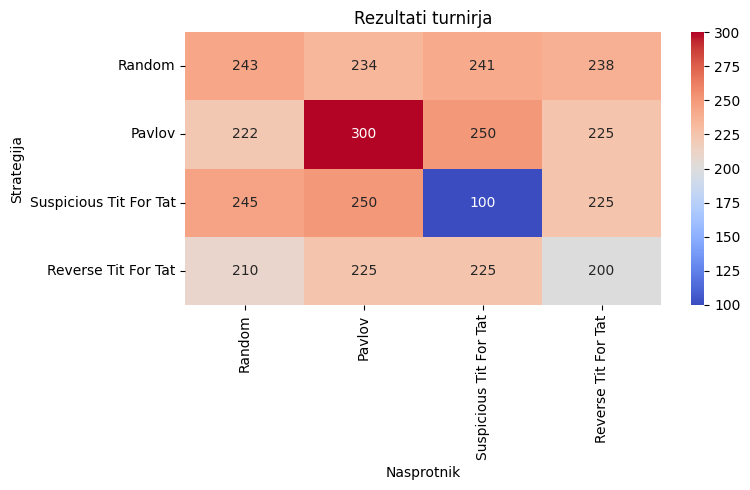

In [65]:
# 1. Heatmap rezultatov
plt.figure(figsize=(8, 5))
sns.heatmap(results, annot=True, cmap="coolwarm", fmt="d")
plt.title("Rezultati turnirja")
plt.ylabel("Strategija")
plt.xlabel("Nasprotnik")
plt.tight_layout()
plt.show()


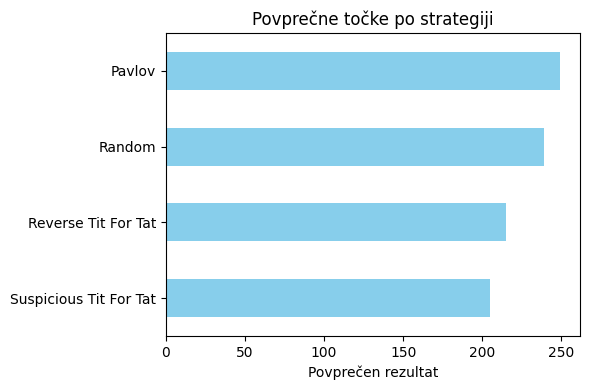

In [66]:
# 2. Povprečni rezultat posamezne strategije
avg_scores = results.mean(axis=1)
plt.figure(figsize=(6, 4))
avg_scores.sort_values().plot(kind='barh', color='skyblue')
plt.title("Povprečne točke po strategiji")
plt.xlabel("Povprečen rezultat")
plt.tight_layout()
plt.show()


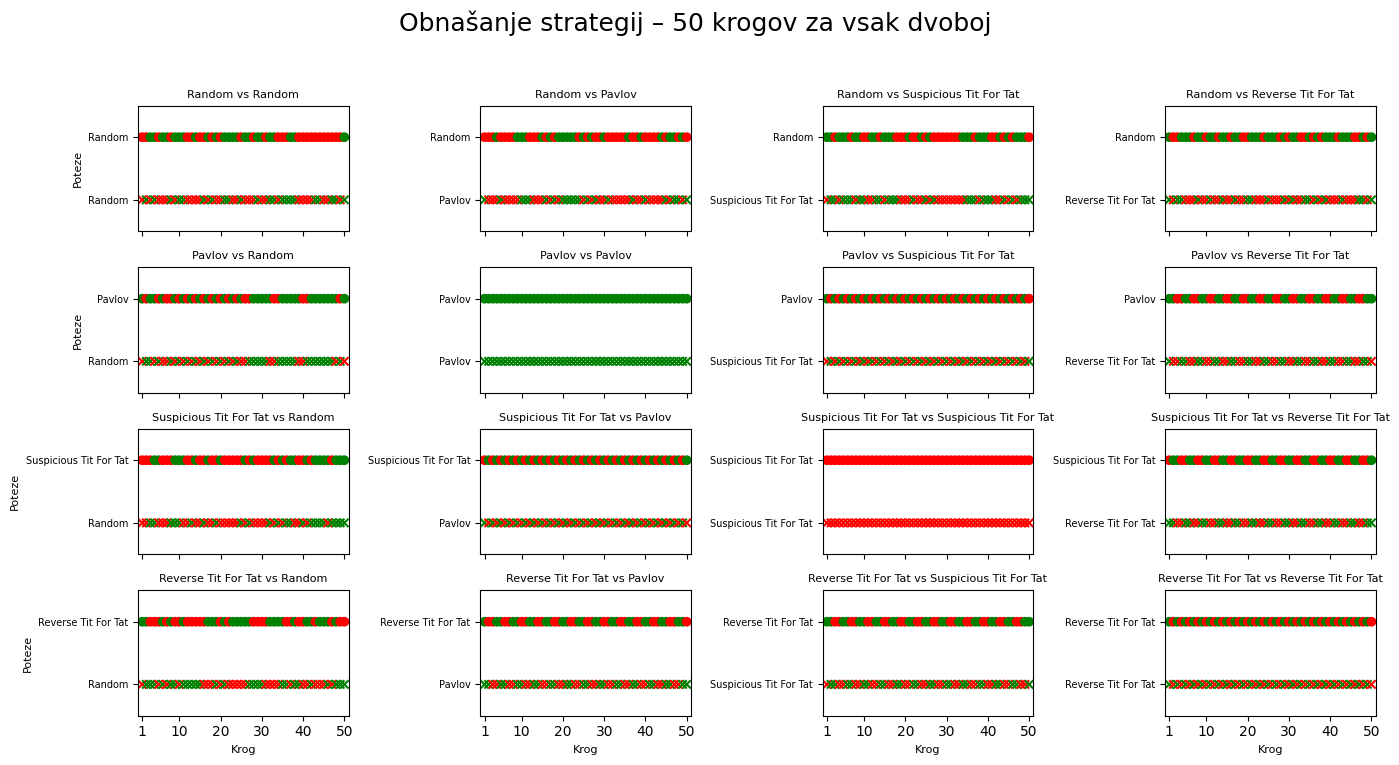

In [67]:
# 3. Prikaz dvobojev (za prvih 50 krogov)
num_strats = len(strategies)
colors = {C: "green", D: "red"}
rounds = list(range(1, 51))

fig, axes = plt.subplots(num_strats, num_strats, figsize=(14, 2 * num_strats), sharex=True)
fig.suptitle("Obnašanje strategij – 50 krogov za vsak dvoboj", fontsize=18)
plt.subplots_adjust(hspace=0.6, wspace=0.3)

for i, strat1 in enumerate(strategies):
    for j, strat2 in enumerate(strategies):
        ax = axes[i, j] if num_strats > 1 else axes[j]
        _, _, h1, h2 = play_match(strat1, strat2, rounds=50)

        ax.scatter(rounds, [2]*50, c=[colors[m] for m in h1], marker='o', label=strat1.name)
        ax.scatter(rounds, [1]*50, c=[colors[m] for m in h2], marker='x', label=strat2.name)
        ax.set_yticks([1, 2])
        ax.set_yticklabels([strat2.name, strat1.name], fontsize=7)
        ax.set_xticks([1, 10, 20, 30, 40, 50])
        ax.set_xlim(0, 51)
        ax.set_ylim(0.5, 2.5)
        if i == num_strats - 1:
            ax.set_xlabel("Krog", fontsize=8)
        if j == 0:
            ax.set_ylabel("Poteze", fontsize=8)
        ax.set_title(f"{strat1.name} vs {strat2.name}", fontsize=8)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


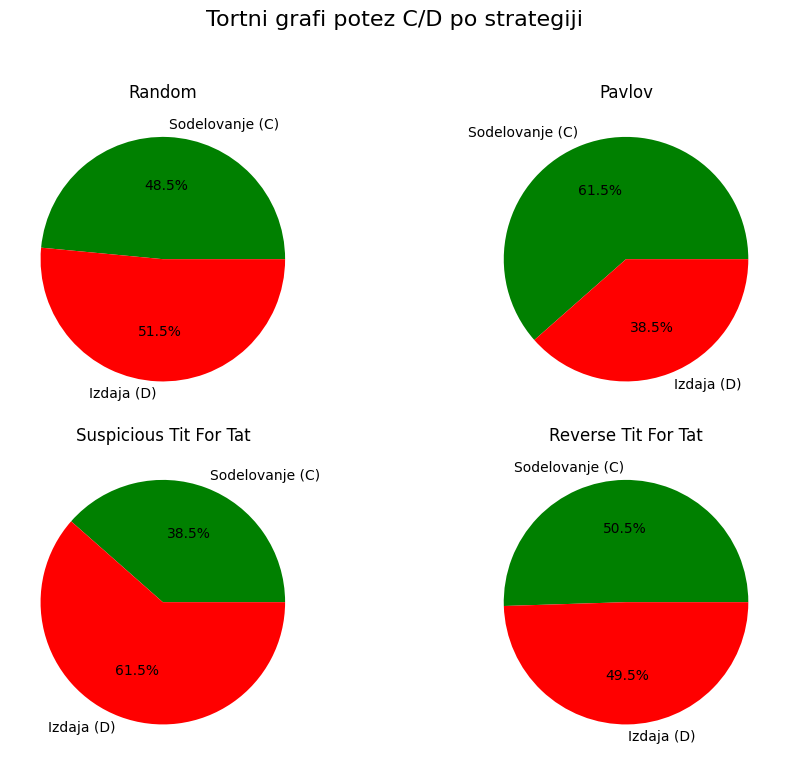

In [68]:
# 4. Tortni grafi
move_counts = {}
for strat in strategies:
    total_moves = []
    for opponent in strategies:
        _, _, h1, _ = play_match(strat, opponent)
        total_moves += h1
    move_counts[strat.name] = {C: total_moves.count(C), D: total_moves.count(D)}

move_df = pd.DataFrame(move_counts).T

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()
for i, (name, row) in enumerate(move_df.iterrows()):
    axes[i].pie([row[C], row[D]],
                labels=["Sodelovanje (C)", "Izdaja (D)"],
                colors=["green", "red"],
                autopct='%1.1f%%')
    axes[i].set_title(f"{name}")

plt.suptitle("Tortni grafi potez C/D po strategiji", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()